## 共享输入层模型

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 25, 25, 32)   544         input[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 21, 21, 16)   1040        input[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 12, 12, 32)   0           conv1[0][0]                      
____________________

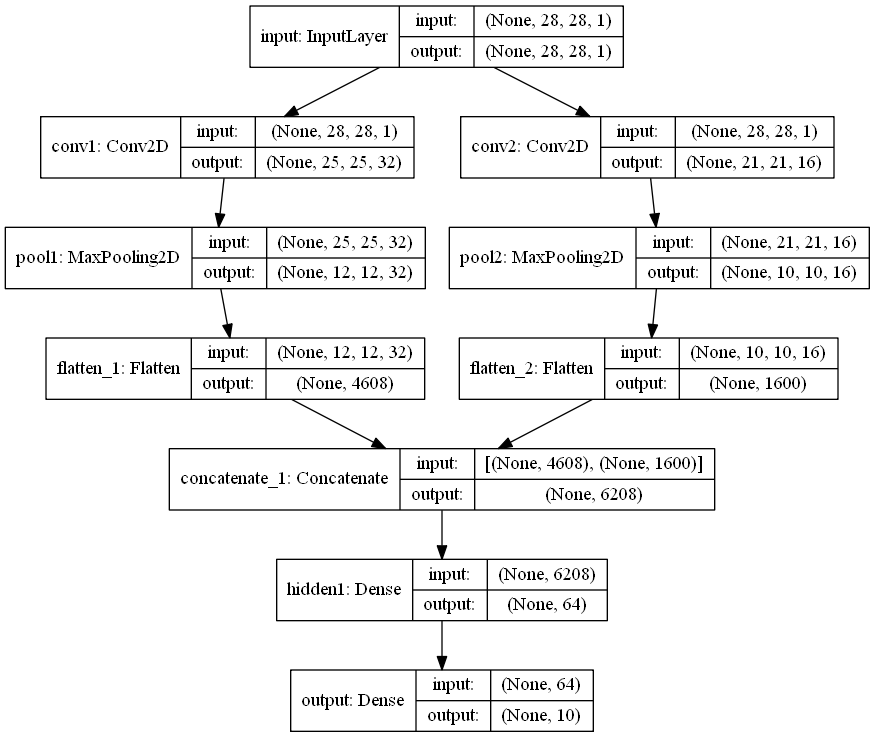

In [1]:
# 共享输入层
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Input, concatenate
from keras.models import Model

# import pydotplus
# from keras.utils import plot_model
# import keras.utils
# keras.utils.vis_utils.pydot = pydotplus


# 输入层
mnist_input = Input(shape=(28,28,1),name='input')

# 第一个特征提取层
conv1 = Conv2D(32,kernel_size=3,activation='relu',name='conv1')(mnist_input) # <- 1.这里
pool1 = MaxPooling2D(pool_size=(2,2),name='pool1')(conv1)
flat1 = Flatten()(pool1)

# 第二个特征提取层
conv2 = Conv2D(16,kernel_size=8,activation='relu',name='conv2')(mnist_input) # <- 2.这里
pool2 = MaxPooling2D(pool_size=(2,2),name='pool2')(conv2)
flat2 = Flatten()(pool2)

# 把这两个特征提取层的结果拼接起来
merge = concatenate([flat1,flat2],axis=-1)

# 进行全连接层
hidden1 = Dense(64,activation='relu',name='hidden1')(merge)

# 输出层
output = Dense(10,activation='softmax',name='output')(hidden1)

# 以model来组合整个网络
model = Model(inputs=mnist_input,outputs=output)

# 打印网络结构
model.summary()

# 网络结构可视化
# plot_model(model,to_file='shared_input_layer.png')
plot_model(model, to_file='model.png', show_shapes=True)